## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """

    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
"""
Compile 模型
"""

model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

1.1874 - accuracy: 0.5867 - val_loss: 1.3827 - val_accuracy: 0.5073
Epoch 369/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.1859 - accuracy: 0.5874 - val_loss: 1.3573 - val_accuracy: 0.5186
Epoch 370/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.1859 - accuracy: 0.5884 - val_loss: 1.3583 - val_accuracy: 0.5209
Epoch 371/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.1849 - accuracy: 0.5886 - val_loss: 1.3599 - val_accuracy: 0.5225
Epoch 372/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.1822 - accuracy: 0.5894 - val_loss: 1.3517 - val_accuracy: 0.5183
Epoch 373/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.1823 - accuracy: 0.5883 - val_loss: 1.3543 - val_accuracy: 0.5206
Epoch 374/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.1805 - accuracy: 0.5892 - val_loss: 1.3749 - val_accuracy: 0.5129
Epoch 375/500
50000/50000 

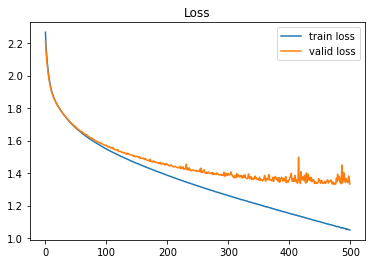

No handles with labels found to put in legend.


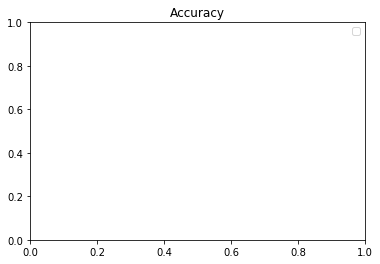

In [14]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]


plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()



plt.legend()
plt.title("Accuracy")
plt.show()